Q1: Slice and Dice

In [87]:
import numpy as np
import pandas as pd
# Data Loading.
df = pd.read_csv('/Users/shan/Desktop/SMU/Fall Mod B/Data Mining/Assignment2/default_of_credit_card_clients.csv',skiprows=1)
#df.columns = df.iloc[0]
#df = df.iloc[1:,:]
df.rename(columns={'default payment next month':'DEFAULT_num'}, inplace=True)
df.rename(columns={'SEX':'SEX_num'}, inplace=True)
df.rename(columns={'EDUCATION':'EDUCATION_num'}, inplace=True)
df.rename(columns={'MARRIAGE':'MARRIAGE_num'}, inplace=True)

df['DEFAULT'] = df['DEFAULT_num'].apply(lambda x: 'yes' if x == 1 else 'no')
df['SEX'] = df['SEX_num'].apply(lambda x: 'male' if x == 1 else 'female')
df['EDUCATION'] = df['EDUCATION_num'].apply(lambda x: 'graduate' if x == 1 else ('university' if x == 2 else ('highschool' if x == 3 else 'others')))
df['MARRIAGE'] = df['MARRIAGE_num'].apply(lambda x: 'married' if x == 1 else ('single' if x == 2 else 'others'))

df.info()

categorical = df.select_dtypes(include = ['object'])
categorical.info()
categorical.head()

#To delimit by a tab you can use the sep argument of to_csv:
df.to_csv('/Users/shan/Desktop/SMU/Fall Mod B/Data Mining/Assignment2/default.csv', index=False, header=df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             30000 non-null  int64 
 1   LIMIT_BAL      30000 non-null  int64 
 2   SEX_num        30000 non-null  int64 
 3   EDUCATION_num  30000 non-null  int64 
 4   MARRIAGE_num   30000 non-null  int64 
 5   AGE            30000 non-null  int64 
 6   PAY_0          30000 non-null  int64 
 7   PAY_2          30000 non-null  int64 
 8   PAY_3          30000 non-null  int64 
 9   PAY_4          30000 non-null  int64 
 10  PAY_5          30000 non-null  int64 
 11  PAY_6          30000 non-null  int64 
 12  BILL_AMT1      30000 non-null  int64 
 13  BILL_AMT2      30000 non-null  int64 
 14  BILL_AMT3      30000 non-null  int64 
 15  BILL_AMT4      30000 non-null  int64 
 16  BILL_AMT5      30000 non-null  int64 
 17  BILL_AMT6      30000 non-null  int64 
 18  PAY_AMT1       30000 non-n

,ID,LIMIT_BAL,SEX_num,EDUCATION_num,MARRIAGE_num,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_num,DEFAULT,SEX,EDUCATION,MARRIAGE
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,yes,female,university,married
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,yes,female,university,single
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,no,female,university,single
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,no,female,university,married
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,no,male,university,married


Q1.1 How many customers are in the sample? 

In [88]:
nrows, ncols = df.shape
print('No of customers in the sample: ',nrows)
print('No of columns in the sample: ',ncols)

No of customers in the sample:  30000
No of columns in the sample:  29


 Q1.2 What is the most common sex in the sample?

In [89]:
male_count = (df['SEX_num'] == 1).sum()
female_count = (df['SEX_num'] == 2).sum()
print('Male: ',male_count)
print('Female: ',female_count)
if(male_count > female_count):
    print('Male is the most common sex in the sample')
else:
    print('Female is the most common sex in the sample')

Male:  11888
Female:  18112
Female is the most common sex in the sample


 Q1.3 Which sex has the most defaults?

In [90]:
male_defaults = df.loc[df['SEX_num'] == 1, 'DEFAULT_num'].sum()
female_defaults = df.loc[df['SEX_num'] == 2, 'DEFAULT_num'].sum()
print('Male: ',male_defaults)
print('Female: ',female_defaults)
if(male_defaults > female_defaults):
    print('Male has the most defaulters in the sample')
else:
    print('Female has the most defaulters in the sample')

Male:  2873
Female:  3763
Female has the most defaulters in the sample


 Q1.4 How many distinct values does marriage take on?

In [91]:
print(df["MARRIAGE_num"].value_counts())
values = df['MARRIAGE_num'].unique()
print(values)
print('Distinct values marriage take on: ',len(values))

2    15964
1    13659
3      323
0       54
Name: MARRIAGE_num, dtype: int64
[1 2 3 0]
Distinct values marriage take on:  4


 Use boxplots or histograms to answer the following:

  Q2.1 How is BILL_AMT1 distributed by sex?

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Count'>

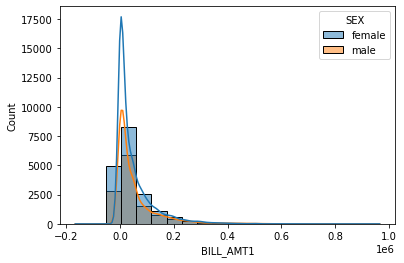

In [92]:
import seaborn as sb
sb.histplot(data=df, x="BILL_AMT1", hue="SEX",bins=20,kde=True)

Q2.2 Does there appear to be any relationship between default and AGE?

<AxesSubplot:xlabel='AGE', ylabel='Count'>

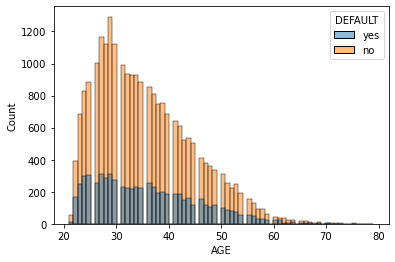

In [93]:
sb.histplot(data=df, x="AGE", hue="DEFAULT")

Yes, there is a relationship between age and loan defaults. Ages between 25 and 45 account for the majority of loan defaults.

Q3.1 What value of k did you decide to use for kNN and why?

K should be set between 121 and 141. We made an effort to evaluate all potential values within the range, and it displays the same accuracy.
K value has been selected as 131.
We calculated the accuracy and error rate by charting them over several ranges, and then we came to a conclusion based on the maximum accuracy and minimal mistake rate.
The steps taken to arrive at the value for K are shown below. The same is visually described in the plots as well.

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
df1 = pd.get_dummies(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ID                    30000 non-null  int64
 1   LIMIT_BAL             30000 non-null  int64
 2   SEX_num               30000 non-null  int64
 3   EDUCATION_num         30000 non-null  int64
 4   MARRIAGE_num          30000 non-null  int64
 5   AGE                   30000 non-null  int64
 6   PAY_0                 30000 non-null  int64
 7   PAY_2                 30000 non-null  int64
 8   PAY_3                 30000 non-null  int64
 9   PAY_4                 30000 non-null  int64
 10  PAY_5                 30000 non-null  int64
 11  PAY_6                 30000 non-null  int64
 12  BILL_AMT1             30000 non-null  int64
 13  BILL_AMT2             30000 non-null  int64
 14  BILL_AMT3             30000 non-null  int64
 15  BILL_AMT4             30000 non-null  int64
 16  BILL

In [34]:
X = df1.drop(columns=['DEFAULT_yes'])
Y = df1['DEFAULT_yes']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (21000, 35) (21000,)
Test set: (9000, 35) (9000,)


In [78]:
accuracy_range1_for_k = []
from sklearn import metrics
for i in range(101,1000,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    accuracy_range1_for_k.append(metrics.accuracy_score(Y_test, yhat))
accuracy_range1_for_k

[0.7751111111111111,
 0.7752222222222223,
 0.7746666666666666,
 0.7743333333333333,
 0.7742222222222223,
 0.7743333333333333,
 0.7743333333333333,
 0.7743333333333333,
 0.7743333333333333]

Maximum accuracy:- 0.7752222222222223 at K = 1


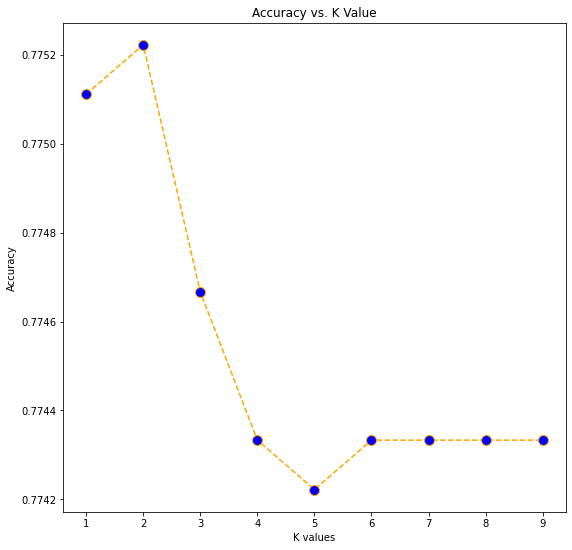

In [110]:
plt.figure(figsize=(9,9))
plt.plot(range(1,10),acc_new_range_1,color = 'orange',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(accuracy_range1_for_k),"at K =",accuracy_range1_for_k.index(max(accuracy_range1_for_k)))

Maximum accuracy:- 0.7752222222222223 at K = 1


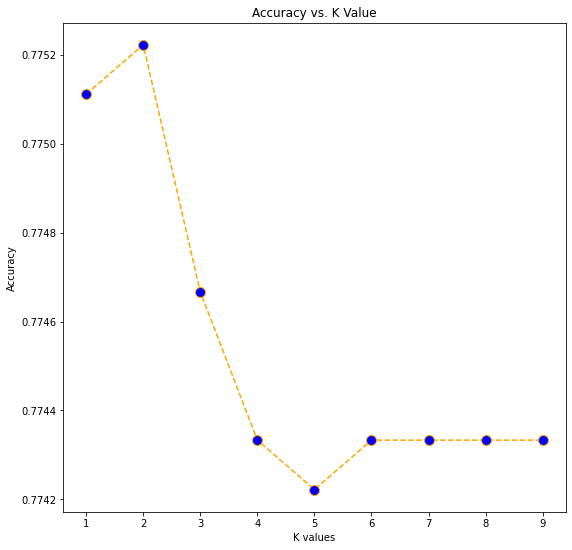

In [111]:
plt.figure(figsize=(9,9))
plt.plot(range(1,10),acc_new_range_1,color = 'orange',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(accuracy_range1_for_k),"at K =",accuracy_range1_for_k.index(max(accuracy_range1_for_k)))

In [38]:
err_arr = []
for i in range(101,1000,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 err_arr.append(np.mean(pred_i != Y_test))

print("Minimum error:-",min(err_arr),"at K =",err_arr.index(min(err_arr)))

Minimum error:- 0.22477777777777777 at K = 1


Text(0, 0.5, 'Error Rate')

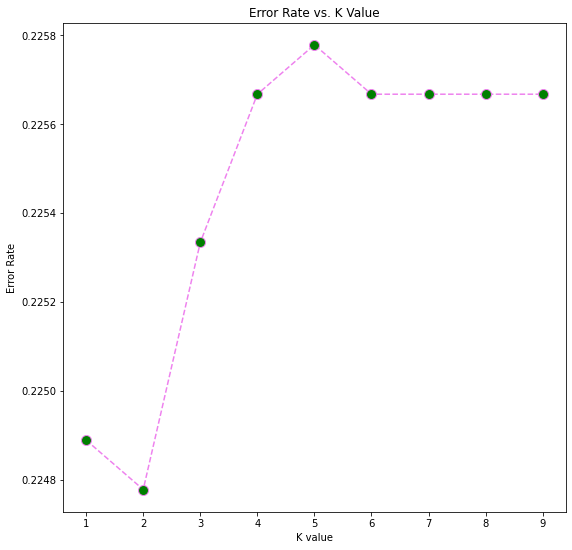

In [40]:
plt.figure(figsize=(9,9))
plt.plot(range(1,10),err_arr,color='violet', linestyle='dashed', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [41]:
accuracy_range2_for_k = []
# Will take some time
from sklearn import metrics
for i in range(101,201,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    accuracy_range2_for_k.append(metrics.accuracy_score(Y_test, yhat))
accuracy_range2_for_k

[0.7751111111111111,
 0.7747777777777778,
 0.7755555555555556,
 0.7755555555555556,
 0.7754444444444445,
 0.7755555555555556,
 0.7754444444444445,
 0.775,
 0.7753333333333333,
 0.7755555555555556]

Maximum accuracy:- 0.7755555555555556 at K = 2


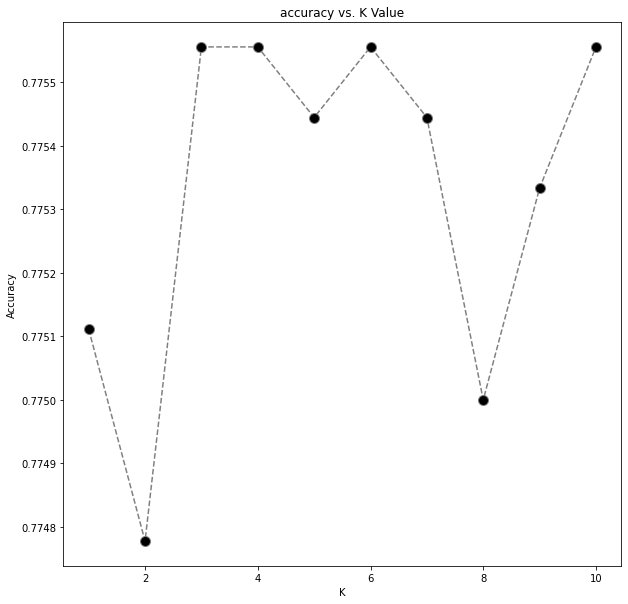

In [43]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),accuracy_range2_for_k,color = 'grey',linestyle='dashed', marker='o',markerfacecolor='black', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(accuracy_range2_for_k),"at K =",accuracy_range2_for_k.index(max(accuracy_range2_for_k)))

In [44]:
err_arr2 = []
for i in range(101,201,10):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 err_arr2.append(np.mean(pred_i != Y_test))

print("Minimum error:-",min(err_arr2),"at K =",err_arr2.index(min(err_arr2)))

Minimum error:- 0.22444444444444445 at K = 2


Text(0, 0.5, 'Error Rate')

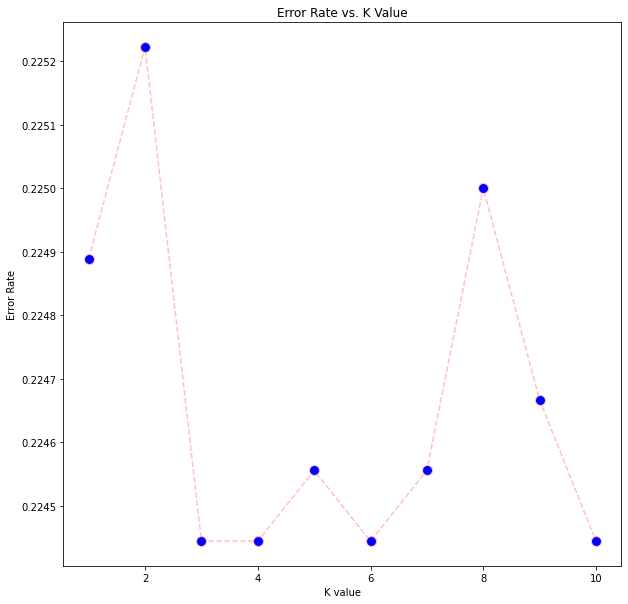

In [48]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),err_arr2,color='pink', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

Q3.4 In k-means clustering, what value of k did you decide to use and why?

We determined the appropriate number of clusters using the elbow approach. Since the elbow started at 4, we used 4 clusters.
We have also visualized the age to help with better understanding.
The clusters for the given sample are shown on the elbow plot.

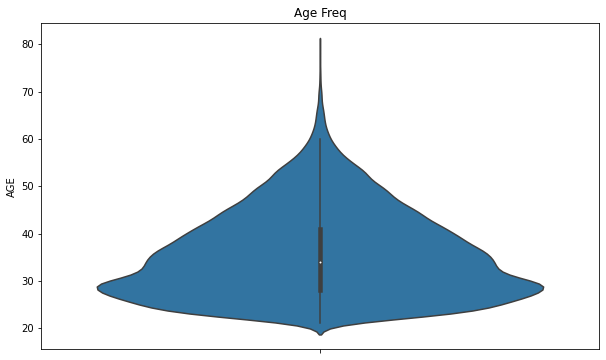

In [94]:
import seaborn as sb
plt.figure(figsize=(10,6))
plt.title("Age Freq")
sb.axes_style("dark")
sb.violinplot(y=df1["AGE"])
plt.show()

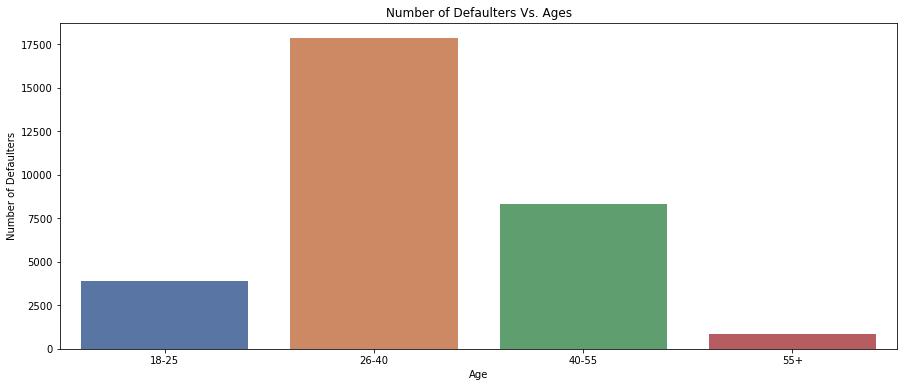

In [107]:
age18to25 = df.loc[(df1.AGE <= 25) & (df1.AGE >= 18), 'DEFAULT_num']
age26to40 = df.loc[(df1.AGE <= 40) & (df1.AGE >= 26), 'DEFAULT_num']
age40to55 = df.loc[(df1.AGE <= 55) & (df1.AGE >= 40), 'DEFAULT_num']
age55above = df.loc[df1.AGE >= 56, 'DEFAULT_num']


x = ["18-25","26-40","40-55","55+"]
y = [len(age18to25.values),len(age26to40.values),len(age40to55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sb.barplot(x=x, y=y, palette="deep")
plt.title("Number of Defaulters Vs. Ages")
plt.xlabel("Age")
plt.ylabel("Number of Defaulters")
plt.show()

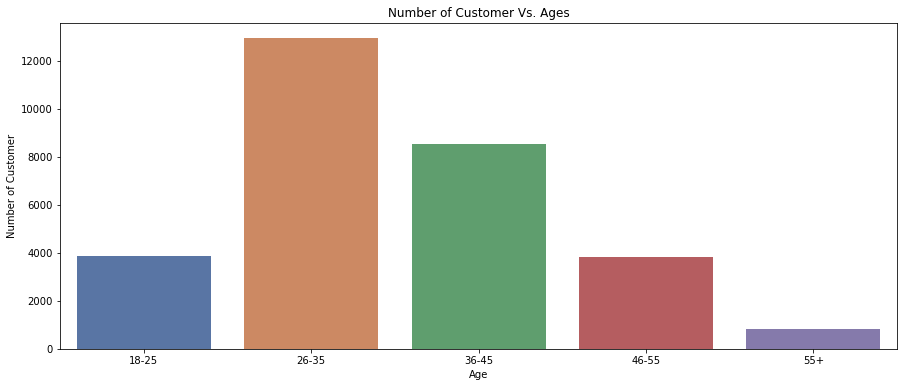

In [108]:
age18to25 = df1.AGE[(df1.AGE <= 25) & (df1.AGE >= 18)]
age26to35 = df1.AGE[(df1.AGE <= 35) & (df1.AGE >= 26)]
age36to45 = df1.AGE[(df1.AGE <= 45) & (df1.AGE >= 36)]
age46to55 = df1.AGE[(df1.AGE <= 55) & (df1.AGE >= 46)]
age55above = df1.AGE[df1.AGE >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18to25.values),len(age26to35.values),len(age36to45.values),len(age46to55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sb.barplot(x=x, y=y, palette="deep")
plt.title("Number of Customer Vs. Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

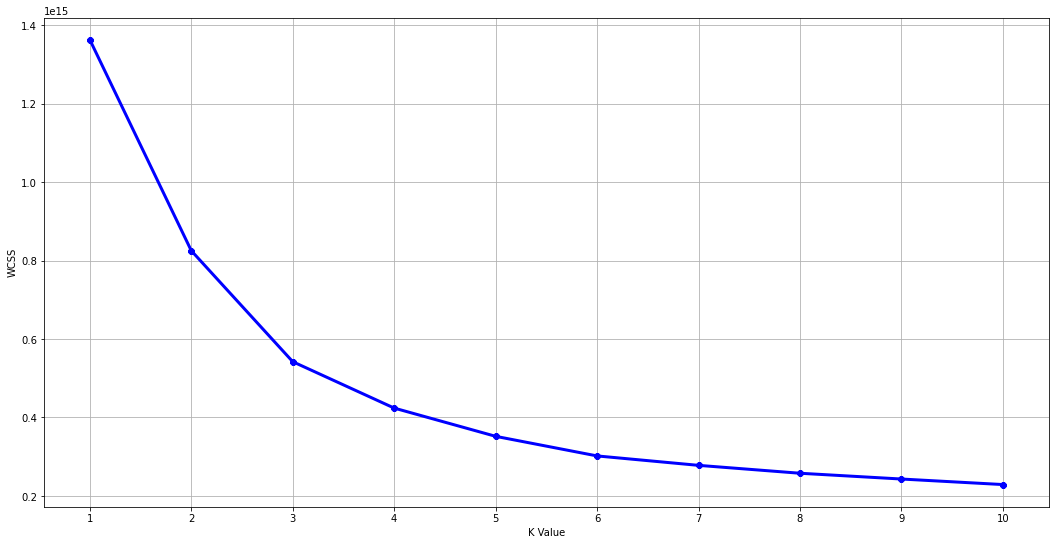

In [109]:
from sklearn.cluster import KMeans
#wcss - sum of squared distance between each point and the centroid in a cluster(Euclidean distance)
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(18,9))    
plt.grid()
plt.plot(range(1,11),res, linewidth=3, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()